# Detección de los trastornos del espectro autista (TEA) usando técnicas de machine learning
### Julia María Martínez Tapia 
#### 31 de marzo de 2021

## Introducción 

**Los trastornos del espectro autista (TEA) son un grupo de afecciones caracterizadas por algún grado de alteración del comportamiento social, la comunicación y el lenguaje, y por un repertorio de intereses y actividades restringido, estereotipado y repetitivo.** 

La evidencia científica disponible indica la existencia de múltiples factores, entre ellos los genéticos y ambientales, que hacen más probable que un niño pueda padecer un TEA

Los TEA aparecen en la infancia y tienden a persistir hasta la adolescencia y la edad adulta. En la mayoría de los casos se manifiestan en los primeros 5 años de vida y se presentan cuatro veces más en hombres que en mujeres. Conllevan a menudo afecciones comórbidas, como epilepsia, depresión, ansiedad y trastorno de déficit de atención e hiperactividad.

Las personas con TEA a menudo son objeto de estigmatización y discriminación, que incluye la privación injusta de atención sanitaria, educación y oportunidades para participar en sus comunidades.

**Estos trastornos suponen una enorme carga emocional y económica para las personas que los padecen y para sus familiares.** 

Segun la Organización Mundial de la Salud, se calcula que uno de cada 160 niños tiene un TEA. Esta estimación representa una cifra media, pues la prevalencia observada varía considerablemente entre los distintos estudios. No obstante, en algunos estudios bien controlados se han registrado cifras notablemente mayores. 

Según los estudios epidemiológicos realizados en los últimos 50 años, la prevalencia mundial de estos trastornos parece estar aumentando. Hay muchas explicaciones posibles para este aparente incremento de la prevalencia, entre ellas una mayor concienciación, la ampliación de los criterios diagnósticos, mejores herramientas diagnósticas y mejor comunicación.

**La intervención en la primera infancia es muy importante para optimizar el desarrollo y bienestar de las personas con un TEA. Por lo tanto, la detección temprana de esta enfermedad es clave para el bienestar de las personas que lo padecen.** 

Sin embargo existen otros trastornos mentales cuyos síntomas son muy similares a los TEA, por lo que la detección es una tarea  difícil 

**Con el auge de la aplicación de modelos basados en aprendizaje automático en las predicciones de diversas enfermedades humanas, ahora parece posible su detección temprana basada en diversos parámetros fisiológicos y de salud.**

## Objetivo del proyecto



**El objetivo del presente trabajo es evaluar la utilidad de varios modelos de machine learning en la predicción de casos de autismo.** 

El dataset utilizado procede de la fusión de tres datasets publicamente disponibles en el repositorio UCI.

Fadi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for Adult” https://archive.ics.uci.edu/ml/machine-learning-databases/00426/

Fadi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for children" https://archive.ics.uci.edu/ml/machine-learning-databases/00419/

adi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for Adolescent” https://archive.ics.uci.edu/ml/machine-learning-databases/00420/

El dataset contiene 20 variables independientes, una columna target y 1100 registros.

Las variables independientes consisten en diez indicadores de comportamiento (behavioural features) y diez carácterísticas individuales que han probado su efectividad para detectar casos de TEA a partir de controles obtenidos de la ciencia del comportamiento.   

Se puede encontrar la descripción de las variables en este [enlace](https://www.kaggle.com/faizunnabi/autism-screening)

## I. Análisis exploratorio de datos (EDA)

In [313]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

### 1. Carga de los datos y análsis preliminar de los datos.

In [226]:
#1. Carga de los datos

In [281]:
raw_data = pd.read_excel("Autism_todos_raw_data.xlsx")

In [282]:
raw_data

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,26.0,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,24.0,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,27.0,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,35.0,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,40.0,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,7.0,'4-11 years',Parent,YES
1096,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,7.0,'4-11 years',Parent,NO
1097,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,4.0,'4-11 years',Parent,YES
1098,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,4.0,'4-11 years',Parent,YES


In [256]:
raw_data.info()
#Curioso, los missings de ethniciy y relation son los mismos, se dan exactamente en los mismos 144 registros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_score         1100 non-null   int64  
 1   A2_score         1100 non-null   int64  
 2   A3_score         1100 non-null   int64  
 3   A4_score         1100 non-null   int64  
 4   A5_score         1100 non-null   int64  
 5   A6_score         1100 non-null   int64  
 6   A7_score         1100 non-null   int64  
 7   A8_score         1100 non-null   int64  
 8   A9_score         1100 non-null   int64  
 9   A10_score        1100 non-null   int64  
 10  screening_score  1100 non-null   int64  
 11  sex              1100 non-null   object 
 12  ethnicity        956 non-null    object 
 13  jaundice         1100 non-null   object 
 14  fam_history_PDD  1100 non-null   object 
 15  country_of_res   1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  age_num       

In [264]:
raw_data["age_num"] = raw_data["age_num"].astype(int,errors = "ignore")#esto no me lo está haciendo, no sé porque.

In [287]:
raw_data.describe()

#tengo un error en age_number, no tiene sentido un max de edad de 383 años. Más adelante lo corrijo.

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,screening_score,age_num,class
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000,1100.000000
mean,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818,22.073126,0.357273
std,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,2.523492,16.879373,0.479414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,21.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000,30.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,383.000000,1.000000


### 2. Análisis del target

Comprobamos si el dataset está desbalanceado comparando el número de registros de las clases que constituyen el target (en este caso, SI o NO autismo)

In [283]:
raw_data["class"]

0        NO
1        NO
2       YES
3        NO
4        NO
       ... 
1095    YES
1096     NO
1097    YES
1098    YES
1099     NO
Name: class, Length: 1100, dtype: object

In [284]:
raw_data["class"].isin(["YES"]).value_counts()

False    707
True     393
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

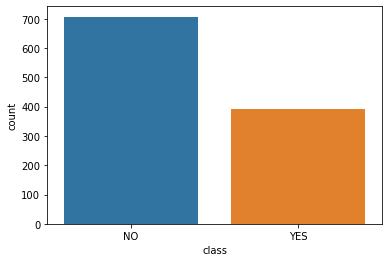

In [285]:
sns.countplot(data = raw_data, x = "class")

In [ ]:
# El dataset está desbalanceado, pero no excesivamente. Por tanto no voy a hacer resampling ni a generar datos sintéticos, 
# pero lo tendré en cuenta a la hora de escoger métricas e hiperparámetros.

In [286]:
#Por otro lado, antes de dividir en train y test voy a transformar los valores de columna target "class" de YES/NO a 1/0 para poder luego 
#aplicarle más adelante el coeficiente de correlación de Person. Lo hago con un apply.

def mapping(x):
    if x == "YES":
        return 1
    elif x == "NO":
        return 0

raw_data["class"] = raw_data["class"].apply(mapping)
raw_data["class"] 


0       0
1       0
2       1
3       0
4       0
       ..
1095    1
1096    0
1097    1
1098    1
1099    0
Name: class, Length: 1100, dtype: int64

### 3. Dividimos el dataset en train y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data.drop("class", axis=1),
                                                    raw_data["class"],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#display(X_train,X_test, y_train, y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 4. Comprensión de las variables y su relación con el target. Reducción preliminar.

In [262]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 507 to 860
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_score         880 non-null    int64  
 1   A2_score         880 non-null    int64  
 2   A3_score         880 non-null    int64  
 3   A4_score         880 non-null    int64  
 4   A5_score         880 non-null    int64  
 5   A6_score         880 non-null    int64  
 6   A7_score         880 non-null    int64  
 7   A8_score         880 non-null    int64  
 8   A9_score         880 non-null    int64  
 9   A10_score        880 non-null    int64  
 10  screening_score  880 non-null    int64  
 11  sex              880 non-null    object 
 12  ethnicity        764 non-null    object 
 13  jaundice         880 non-null    object 
 14  fam_history_PDD  880 non-null    object 
 15  country_of_res   880 non-null    object 
 16  used_app_before  880 non-null    object 
 17  age_num       

A continuación obtenemos un reporte de las columnas, con sus tipos, % de missings y cardinalidad.

In [267]:

def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])
    
    #la cardinalidad aporta información en las columnas categóricas. Si la cardinalidad es alta es que hay muchos valores únicos, normalmente 
    #serán identificadores (como nombres propios) y, dependiendo del dataset es probable que esa columna no aporte nada al target y la podamos
    #eliminar. 
    
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(raw_data)

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,object,object,object,float64,object,object,object
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,...,0,13.09,0,0,0,0,0.55,0,13.09,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,...,2,11,2,2,89,2,59,4,6,2
CARDIN (%),0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,...,0.18,1,0.18,0.18,8.09,0.18,5.36,0.36,0.55,0.18


Obtenemos el coeficiente de correlación lineal de cada una de las variables independientes con el target y lo representamos en una gráfica.

In [289]:
#Obtenemos el coeficiente de correlación lineal (Pearson) de las variables independientes numéricas con el target

corr = np.abs(raw_data.corr()["class"]).sort_values(ascending = False)
print(corr)


class              1.000000
screening_score    0.834223
A9_score           0.596497
A6_score           0.567634
A5_score           0.520985
A4_score           0.508243
A3_score           0.462104
A10_score          0.421044
A7_score           0.347273
A1_score           0.290603
A2_score           0.285832
A8_score           0.275809
age_num            0.102379
Name: class, dtype: float64


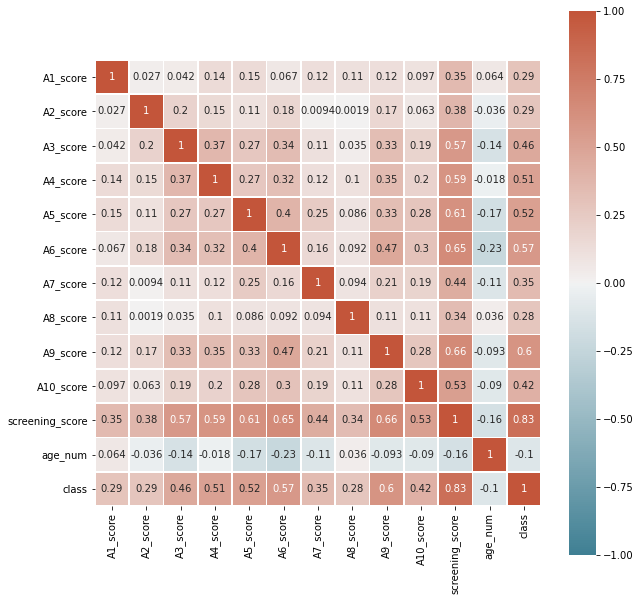

In [350]:
#Mostramos la correlación en un heatmap

plt.figure(figsize=(10,10))

sns.heatmap(raw_data.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);

Observamos que existen 7 variables numéricas con una correlación con el target superior al 0.4, por este orden:
    
+ screening_score    0.834223 - Puntuación resultante del método de screening.
+ A9_score           0.596497 - *9.	I find easy to work out what someone is thinking or feeling just by looking at their face.*
+ A6_score           0.567634 - *6.	I know how to tell if someone listening to me is getting bored*
+ A5_score           0.520985 - *5.	I find it easy to read between the lines when someone is talking to me.* 
+ A4_score           0.508243 - *4.	If there is an interruption, I can switch back to what I was doing very quickly.*
+ A3_score           0.462104 - *3.	I find it easy to do more than one thing at once.*
+ A10_score          0.421044 - *10. I find it difficult to work out people´s intentions*

Para poder visualizar la correlacion de las variables categóricas con el target utilizamos una matriz de Phick en lugar del coeficiente de correlación de Pearson, que éstá limitado a las variables numéricas. Como son muchas variables en total, para que no me salga un heatmap imposible de entender voy a tomar para el Phick sólo las columnas categóricas.

In [298]:
categoricas = raw_data[['sex', 'ethnicity', 'jaundice', 'fam_history_PDD', 'country_of_res',
                        'used_app_before','age_desc', 'relation',"class"]]

categoricas


,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_desc,relation,class
0,f,White-European,no,no,'United States',no,'18 and more',Self,0
1,m,Latino,no,yes,Brazil,no,'18 and more',Self,0
2,m,Latino,yes,yes,Spain,no,'18 and more',Parent,1
3,f,White-European,no,yes,'United States',no,'18 and more',Self,0
4,f,NaN,no,no,Egypt,no,'18 and more',NaN,0
...,...,...,...,...,...,...,...,...,...
1095,f,White-European,yes,yes,'United Kingdom',no,'4-11 years',Parent,1
1096,f,White-European,yes,yes,Australia,no,'4-11 years',Parent,0
1097,m,Latino,no,no,Brazil,no,'4-11 years',Parent,1
1098,m,'South Asian',no,no,India,no,'4-11 years',Parent,1


interval columns not set, guessing: ['class']


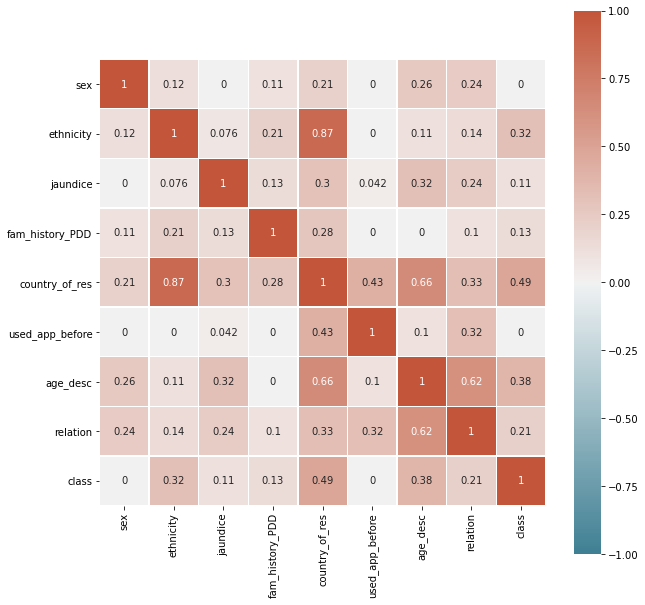

In [352]:
import phik
phik_matrix = categoricas.phik_matrix()

plt.figure(figsize=(10,10))

sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);


Me sorprende que la variable edad no tenga ninguna correlación con el target, esperaba que la tuviese. También me sorprende la baja correlación de la variable jaundice y fam_history_PDD.
No obstante, por ahora las mantengo. 

Sí que elimino, por el contrario, la variable used_app_before

In [301]:
# Reducción preliminar de features:

X_train.drop(columns = ["fam_history_PDD"], inplace = True)    

### 5. Análisis univariante

**5.1 A1_score', 'A2_score', 'A3_score', 'A4_score', 'A5_score', 'A6_score','A7_score', 'A8_score', 'A9_score', 'A10_score'**

Estas variables representan diez indicadores de comportamiento (behavioural features) definidos en el método de screening
aplicado por los autores del dataset. Se basan en las respuestas dadas por las personas objeto del screening 
a un cuestionario de 10 preguntas.
Se trata de variables categóricas cuyo valor puede ser 0 o 1 (tipo numérico).  

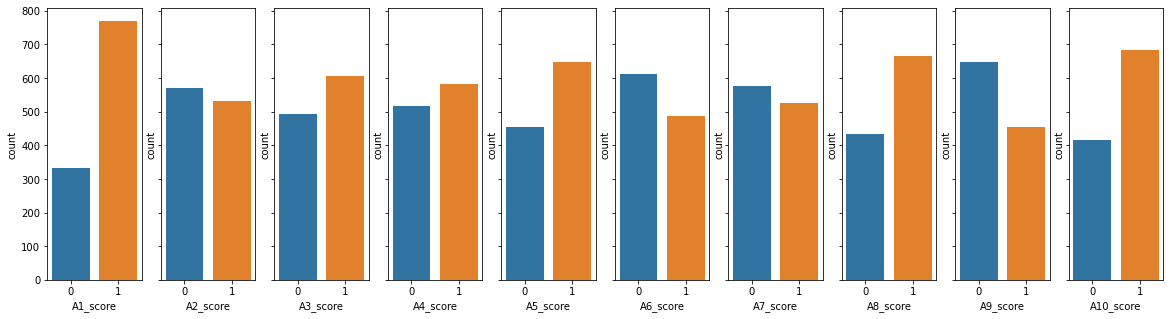

In [324]:
#Analizamos su distribución 

fig, axes = plt.subplots(1, 10, figsize=(20, 5), sharey=True)

sns.countplot(raw_data["A1_score"], ax=axes[0])
#axes[0].set_title("A1_score")

sns.countplot(raw_data["A2_score"], ax=axes[1])
#axes[1].set_title("A2_score")

sns.countplot(raw_data["A3_score"], ax=axes[2])
#axes[2].set_title("A3_score")

sns.countplot(raw_data["A4_score"], ax=axes[3])
#axes[3].set_title("A4_score")

sns.countplot(raw_data["A5_score"], ax=axes[4])
#axes[4].set_title("A5_score")

sns.countplot(raw_data["A6_score"], ax=axes[5])
#axes[5].set_title("A6_score")

sns.countplot(raw_data["A7_score"], ax=axes[6])
#axes[6].set_title("A7_score")

sns.countplot(raw_data["A8_score"], ax=axes[7]);
#axes[7].set_title("A8_score")

sns.countplot(raw_data["A9_score"], ax=axes[8]);
#axes[8].set_title("A9_score")

sns.countplot(raw_data["A10_score"], ax=axes[9]);
#axes[9].set_title("A10_score");


#### 5.2 Screening score

Puntuación resultante del método de screening. Tiene un coeficiente de correlación de Pearson con el target de 0.834223  


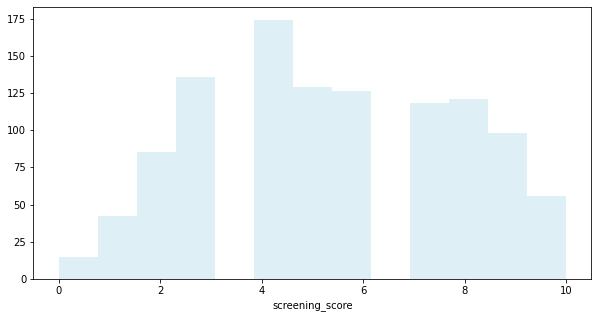

In [358]:
#Distribución 

plt.figure(figsize=(10,5))

sns.distplot(raw_data["screening_score"], kde = False, color = "lightblue");

#NO COMPRENDO PORQUÉ SALE ASÍ EL GRAFICO, PREGUNTAR!!!!

In [346]:
raw_data["screening_score"].unique()

raw_data["screening_score"].isin([8]).value_counts()

False    979
True     121
Name: screening_score, dtype: int64

In [231]:
#tengo un error en age_number, no tiene sentido un max de 383 años. Hago un boxplot para localizar el error  
#en esta variable. 

fig = px.box(raw_data, y="age_num")
fig.show()
#parece que sólo tengo un error. Sustituyo ese valor por la media de su rango.


In [177]:
raw_data.groupby("age_desc")["age_num"].mean()

age_desc
'12-15 years'    15.000000
'12-16 years'    14.072165
'18 and more'    29.698006
'4-11 years'      6.354167
Name: age_num, dtype: float64

In [192]:
#Sustituimos el error por la media de edad en su rango, que es "18 and more"
raw_data["age_num"].groupby

raw_data["age_num"].isin([383])

raw_data["age_num"] = raw_data["age_num"].replace(383.0,30)

In [193]:
raw_data.describe()

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,screening_score,age_num
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000
mean,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818,21.750457
std,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,2.523492,12.871768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,21.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,64.000000


In [194]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])
    
    #la cardinalidad aporta información en las columnas categóricas. Si la cardinalidad es alta es que hay muchos valores únicos, normalmente 
    #serán identificadores (como nombres propios) y, dependiendo del dataset es probable que esa columna no aporte nada al target y la podamos
    #eliminar. 
    
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(raw_data)

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,object,object,object,float64,object,object,object
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,...,0,13.09,0,0,0,0,0.55,0,13.09,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,...,2,11,2,2,89,2,58,4,6,2
CARDIN (%),0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,...,0.18,1,0.18,0.18,8.09,0.18,5.27,0.36,0.55,0.18


In [135]:
data_report(raw_data.iloc[:,-11:])

COL_N,screening_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
DATA_TYPE,int64,object,object,object,object,object,object,float64,object,object,object
MISSINGS (%),0,0,13.09,0,0,0,0,0.55,0,13.09,0
UNIQUE_VALUES,11,2,11,2,2,89,2,59,4,6,2
CARDIN (%),1,0.18,1,0.18,0.18,8.09,0.18,5.36,0.36,0.55,0.18


In [ ]:
#Tenemos un 13.09% de missings en etnicity y relation, y sólo un 0,5% en age_num.
#Ojo que las dos primeras son categóricas, tendría que codificarlas numericamente para poder imputarlas con un KNN.

#Otra opción es sustituirlas por la moda, es decir, por el valor más frecuente, que sí se admite en categóricas???

In [208]:
print(raw_data["ethnicity"].unique())

print(raw_data["ethnicity"].mode())

['White-European' 'Latino' nan 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
0    White-European
dtype: object


In [209]:
#ojo que en "relation" tenemos además un problema con la inicial de self (unos están con mayúscula y otros con minúscula),
#lo corrijo lo primero. 
raw_data["relation"] = raw_data["relation"].replace("self","Self")
print(raw_data["relation"].unique())
print(raw_data["relation"].mode())


['Self' 'Parent' nan "'Health care professional'" 'Relative' 'Others']
0    Self
dtype: object


In [210]:
# Imputacion mediante KNN para el caso de la columna numérica age_num.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit(raw_data[['age_num']])
raw_data[['age_num']] = imputer.transform(raw_data[['age_num']])

In [221]:
#reemplazo los missing de relation por la moda, que es White-European.
raw_data["ethnicity"] = raw_data["ethnicity"].replace([None],"White-European")

In [222]:
#reemplazo los missing de ethnicity por la moda, que es Self.
raw_data["relation"] = raw_data["relation"].replace([None],"Self")

In [223]:
data_report(raw_data)

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,object,object,object,float64,object,object,object
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,...,2,11,2,2,89,2,59,4,5,2
CARDIN (%),0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,...,0.18,1,0.18,0.18,8.09,0.18,5.36,0.36,0.45,0.18
